### Import required packages

In [1]:
import numpy as np #For Numerical computations
import pandas as pd #I/O operations(Reading data from a file)
import matplotlib.pyplot as plt #For plotting purpose
import seaborn as sns #Plotting effectively then matplotlib(Overriding the styles of matplotlib)
import os #For dir level operations
import math #Math operations
import cv2 #Image reading
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join #To check an item is a file or not and for directory path joining purpose
from random import shuffle #Shuffling purpose
from sklearn.decomposition import PCA
import tensorflow as tf #Tensorflow for Deep Learning
from keras.models import Sequential #For Adding layers to NN
from keras.layers import Conv2D, MaxPooling2D #For Convolution & MaxPooling steps in CNN
from keras.layers import Activation, Dropout, Flatten, Dense #For Activation, Dropout-Regularization(Avoid overfitting), Flatten- Flattening the layers, Dense- Final Layer
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


#### Present Working Directory

In [2]:
pwd

'E:\\SK-\\DL\\Gender Classification'

In [3]:
#Check the current directory and then move to the required directory where the images are stored for our CNN
os.chdir('E:\\SK-\\DL\\Gender Classification\\UTKFace\\UTKFace')

In [4]:
#Now, Read an image using Image library from PIL and resize it to (128,128)
img = Image.open('1_0_0_20161219140642920.jpg.chip.jpg').resize((128,128))

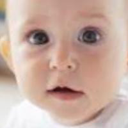

In [5]:
img

In [6]:
#Now, in this directory, we check all the items are files or not(Safety purpose)
fileonly = os.listdir() #Gives all the files in this directory
print(len(fileonly)) #Checking the no. of items in this dir

23708


### The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg
### Male-0 & Female-1

In [7]:
#Checking how to split
fileonly[0].split('_')

['100', '0', '0', '20170112213500903.jpg.chip.jpg']

In [8]:
#So, we extract the 2nd element(gender) as we are trying to classify whether a person is Male/Female.
gender = [file.split('_')[1] for file in fileonly] #Extracting the 2nd element(Gender)

In [9]:
#Just checking
gender[:10]

['0', '0', '1', '1', '1', '1', '1', '1', '1', '1']

In [10]:
#Checking the type of the element in the gender list
type(gender[0])

str

In [11]:
#Gender - 0/1 is in str format...so, we convert them to int
classes = []
for item in gender:
    item = int(item)
    classes.append(item)

In [12]:
#Checking the type of the item in classes
type(classes[0])

int

### Now, Converting Images to Vectors

In [13]:
X_data = []
for file in fileonly:
    face = cv2.imread(file)
    face = cv2.resize(face, (128, 128))
    X_data.append(face)

In [14]:
X = np.squeeze(X_data) #Squeezing the data

In [15]:
X.shape

(23708, 128, 128, 3)

### Normalizing the data

In [16]:
X = X.astype('float32')
X /= 255

In [17]:
#Categorical labels
categorical_labels = to_categorical(classes, num_classes = 2)

In [18]:
categorical_labels[:6]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Data Splitting

In [20]:
#x_train, y_train, x_test, y_test
(x_train , y_train) , (x_test, y_test) = (X[:15008], categorical_labels[:15008]),(X[15008:], categorical_labels[15008:])

#x_valid, y_valid
(x_valid, y_valid) = (x_test[:7000], y_test[:7000])

#x_test, y_test
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [21]:
#Checking the all observations are equal to total obs.
len(x_train) + len(x_test) + len(x_valid) == len(X)

True

### Model Building

In [22]:
#Starting Layers
model = tf.keras.Sequential()

In [24]:
#Adding First layer(Convolutional Layer)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape = (128, 128, 3)))

In [25]:
#MaxPooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [26]:
#Add a DropOut layer to avoid overfitting
model.add(tf.keras.layers.Dropout(0.4))

In [27]:
#2nd Convolutional Layer for better performance
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

In [28]:
#2nd MaxPooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [29]:
#2nd DropOut
model.add(tf.keras.layers.Dropout(0.3))

In [30]:
#Flatten Layer
model.add(tf.keras.layers.Flatten())

In [31]:
#Dense
model.add(tf.keras.layers.Dense(256, activation='relu'))
#DropOut
model.add(tf.keras.layers.Dropout(0.5))

In [32]:
#Output Layer
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

In [33]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [34]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training the model on the input data
model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_data=(x_valid, y_valid))

Train on 15008 samples, validate on 7000 samples
Epoch 1/30
15008/15008 [==============================] - 413s 27ms/sample - loss: 0.6066 - accuracy: 0.6965 - val_loss: 0.5227 - val_accuracy: 0.7669
Epoch 2/30
15008/15008 [==============================] - 395s 26ms/sample - loss: 0.3824 - accuracy: 0.8282 - val_loss: 0.3498 - val_accuracy: 0.8623
Epoch 3/30
15008/15008 [==============================] - 394s 26ms/sample - loss: 0.3417 - accuracy: 0.8484 - val_loss: 0.3046 - val_accuracy: 0.8706
Epoch 4/30
15008/15008 [==============================] - 395s 26ms/sample - loss: 0.3181 - accuracy: 0.8554 - val_loss: 0.2909 - val_accuracy: 0.8819
Epoch 5/30
15008/15008 [==============================] - 389s 26ms/sample - loss: 0.3014 - accuracy: 0.8684 - val_loss: 0.3004 - val_accuracy: 0.8676
Epoch 6/30
15008/15008 [==============================] - 390s 26ms/sample - loss: 0.2934 - accuracy: 0.8687 - val_loss: 0.3152 - val_accuracy: 0.8679
Epoch 7/30
15008/15008 [=====================